In [119]:
import torch
from torch.autograd import grad

## 1D

In [120]:
# wrapped automatic differentiation computes derivatives
def getDerivative(y, x):
    dydx = grad(y, x, torch.ones( (x.size()[0], 1) ), create_graph=True, retain_graph=True)
    return dydx[0]

# residual equation
def r(model, x, EA, p):
    u = model(x)
    dudx = getDerivative(u, x)
    dEAdudxx = getDerivative(EA(x) * dudx, x)
    r = dEAdudxx + p(x)
    return r

In [121]:
inputDim = outputDim = 1
hiddenDim = 100

model = torch.nn.Sequential(torch.nn.Linear(inputDim, hiddenDim),
                            torch.nn.Tanh(),
                            torch.nn.Linear(hiddenDim, outputDim))


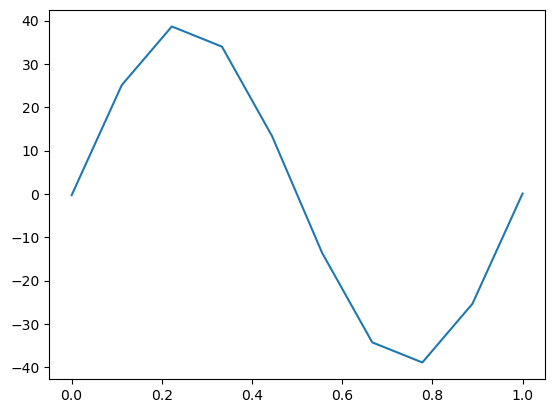

In [197]:
import matplotlib.pyplot as plt
x = torch.linspace(0, 1, 10, requires_grad=True).unsqueeze(1)
rPred = r(model, x, EA, p)


Untrained Model total loss, lossR: 6967.61962890625
Untrained Model prediction for
      x      	  rPred: 
[[  0.          -0.29025713]
 [  0.11111111  25.101418  ]
 [  0.22222222  38.631195  ]
 [  0.33333334  33.979694  ]
 [  0.44444445  13.338736  ]
 [  0.5555556  -13.61506   ]
 [  0.6666667  -34.249107  ]
 [  0.7777778  -38.886967  ]
 [  0.8888889  -25.337124  ]
 [  1.           0.08049229]]


Text(0, 0.5, 'rPred')

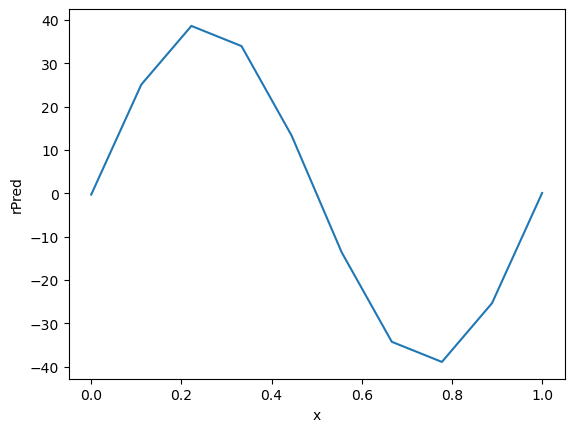

In [207]:
x = torch.linspace(0, 1, 10, requires_grad=True).unsqueeze(1)
EA = lambda x: 1 + 0 * x
p = lambda x: 4 * torch.pi ** 2 * torch.sin(2 * torch.pi * x)
rPred = r(model, x, EA, p)
lossR = torch.sum(rPred ** 2)
 
print(f"Untrained Model total loss, lossR: {lossR}\n")

table = torch.cat((x, rPred), dim=1).detach().numpy()
print(f"Untrained Model prediction for\n      x      \t  rPred: \n{table}")

plt.plot(x.detach().numpy(),  rPred.detach().numpy())
plt.xlabel('x')
plt.ylabel('rPred')

In [215]:
# Impose Dirichlet BCs with Loss function at Boundaries
u0 = 0
u1 = 0

u0Pred = model(torch.tensor([0.]))
u1Pred = model(torch.tensor([1.]))
lossB = (u0Pred - u0) ** 2 + (u1Pred - u1) ** 2
print(f"lossB: {lossB.item()}")

lossB: 0.03805150091648102


In [221]:
from torch.optim import Adam


## 2D

In [ ]:
Lx1 = Lx2= 1
Nx1 = Nx2 = 10

x1 = torch.linspace(0, Lx1, Nx1)
x2 = torch.linspace(0, Lx2, Nx2)
x1, x2 = torch.meshgrid(x1, x2, indexing='ij')
x1.requires_grad = True
x2.requires_grad = True
modelInput = torch.cat((x1.reshape(-1, 1), x2.reshape(-1, 1)), 1)

uPred = model(modelInput)